In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import math 

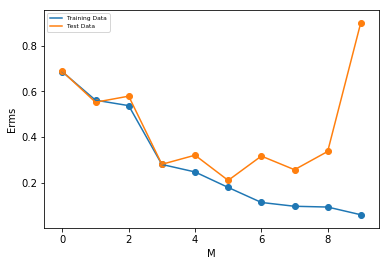

In [41]:
#First, lets generate some simulated data.  Suppose the true function is a sine curve. 
u = 1.05
l1 =0.1
l2 =0.05 
N = 10
gVar = 0.1
step = 0.1
x1 = np.arange(l1,u,step) #Training data 
e = np.random.normal(0,gVar,N)
t1 = np.sin(2*math.pi*x1) + e 
x2 = np.arange(l2,u,step)  #Validation data
t2 = np.sin(2*math.pi*x2) + e
#print(x1)
#print(x2)
#print(e)
M_list=[]
error1_list=[]
error2_list=[]

#Then we can fit the data using the polynomial curve fitting method we derived
for M in range(0,10):
    X1 = np.array([x1**m for m in range(M+1)]).T
    # print(X)
    M_list.append(M)
    w = np.linalg.inv(X1.T@X1)@X1.T@t1
    error1 = np.linalg.norm(w.T@X1.T - t1.T, ord=2)
    erms1 = (2*error1/N)**0.5
    #print(w)
    #Now let us use the weights in test
    if erms1 <= 1:
        error1_list.append(erms1)
    xrange = np.arange(l2,u,0.1)  #get equally spaced points in the xrange
    y = np.sin(2*math.pi*xrange) #compute the true function value
    X2 = np.array([x2**m for m in range(w.size)]).T
    error2 = np.linalg.norm(w.T@X2.T - t2.T, ord=2)
    erms2 = (2*error2/N)**0.5 
    error2_list.append(erms2)

    #add legend and axes labels
plt.ylabel('Erms') #label x and y axes
plt.xlabel('M')
plt.scatter(M_list,error1_list)
plt.scatter(M_list,error2_list)
p1=plt.plot(M_list,error1_list)
p2=plt.plot(M_list,error2_list)
plt.legend((p1[0],p2[0]),('Training Data', 'Test Data'), fontsize=6)
plt.rcParams["axes.titlesize"] = 10